## MNIST dataset 생성

In [1]:
### 필요한 라이브러리 임폴트

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
### 랜덤 시드 설정
tf.random.set_seed(99)
np.random.seed(99)

In [3]:
### MNIST 데이터 불러오기
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')

11490434/11490434 [==============================] - 2s 0us/step
학습용 데이터의 모양 : (60000, 28, 28)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (10000, 28, 28)


In [4]:
### 학습용 / 평가용 데이터 --> 4차원으로 변경

# 학습용 데이터의 변경
X_train = X_train.reshape((60000, 28, 28, 1))

# 평가용 데이터의 변경
X_test = X_test.reshape((10000, 28, 28 ,1))

In [5]:
### MinMaxScaling(normalization) 적용

X_train = X_train/255
X_test = X_test/255

# 결과 확인하기
print(f'학습용 데이터 픽셀의 최대값 : {np.max(X_train)}')
print(f'학습용 데이터 픽셀의 최소값 : {np.min(X_train)}')
print('-'*80)
print(f'평가용 데이터 픽셀의 최대값 : {np.max(X_test)}')
print(f'평가용 데이터 픽셀의 최소값 : {np.min(X_test)}')


학습용 데이터 픽셀의 최대값 : 1.0
학습용 데이터 픽셀의 최소값 : 0.0
--------------------------------------------------------------------------------
평가용 데이터 픽셀의 최대값 : 1.0
평가용 데이터 픽셀의 최소값 : 0.0


## Encoder 모델 생성

In [6]:
# ### Encoder 모델 생성 함수 정의(1)
# def create_encoder():
#     encoder = tf.keras.Sequential()
#     # 28*28*1 --> 28*28*32
#     encoder.add(tf.keras.layers.Conv2D(filters=32, 
#                                        kernel_size=(3,3), 
#                                        padding='same', 
#                                        strides=1, 
#                                        activation='relu', 
#                                        input_shape=(28,28,1)))
#     encoder.add(tf.keras.layers.BatchNormalization())
#     # 28*28*32 --> 14*14*64
#     encoder.add(tf.keras.layers.Conv2D(filters=64,
#                                        kernel_size=(3,3),
#                                        padding='same',
#                                        strides=2,
#                                        activation='relu'))
#     encoder.add(tf.keras.layers.BatchNormalization())
#     # 14*14*64 --> 7*7*64
#     encoder.add(tf.keras.layers.Conv2D(filters=64,
#                                        kernel_size=(3,3),
#                                        padding='same',
#                                        strides=2,
#                                        activation='relu'))
#     encoder.add(tf.keras.layers.BatchNormalization())
#     # 7*7*64 --> 7*7*64
#     encoder.add(tf.keras.layers.Conv2D(filters=64,
#                                        kernel_size=(3,3),
#                                        padding='same',
#                                        strides=1,
#                                        activation='relu'))
#     encoder.add(tf.keras.layers.BatchNormalization())
#     # Flatten()
#     encoder.add(tf.keras.layers.Flatten())
#     # 결과를 성분 원소 2개의 1차원 배열로 변환
#     encoder.add(tf.keras.layers.Dense(units=2)) 

#     return encoder

In [7]:
### Encoder 모델 생성 함수 정의(2)
def create_encoder():
    encoder_input = tf.keras.Input(shape=(28,28,1))
    # 28*28*1 --> 28*28*32
    x = tf.keras.layers.Conv2D(filters=32,
                               kernel_size=(3,3),
                               padding='same',
                               strides=1,
                               activation='relu',
                               input_shape=(28, 28, 1))(encoder_input)
    x = tf.keras.layers.BatchNormalization()(x)
    # 28*28*32 --> 14*14*64
    x = tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3,3),
                               padding='same',
                               strides=2,
                               activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # 14*14*64 --> 7*7*64
    x = tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3,3),
                               padding='same',
                               strides=2,
                               activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # 7*7*64 --> 7*7*64
    x = tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3,3),
                               padding='same',
                               strides=1,
                               activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # Flatten()
    x = tf.keras.layers.Flatten()(x)
    # 결과를 성분 원소 2개의 1차원 배열로 변환
    encoder_output = tf.keras.layers.Dense(units=2)(x)

    encoder_model = tf.keras.Model(inputs=encoder_input, outputs=encoder_output)

    return encoder_model

In [8]:
### encoder 구조 확인
encoder_model = create_encoder()
encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928 

## Decoder 모델 생성

In [9]:
# ### decoder 모델 생성 함수 정의(1)
# def create_decoder():
#     decoder = tf.keras.Sequential()
#     # input으로는 성분 원소 2개인 1차원 배열 입력
#     decoder.add(tf.keras.layers.Dense(units=7*7*64, input_shape=(2,)))
#     # tf.keras.layers.reshape((7,7,64))
#     decoder.add(tf.keras.layers.Reshape((7,7,64)))
#     # 7*7*64 --> 7*7*64 
#     decoder.add(tf.keras.layers.Conv2DTranspose(filters=64,
#                                                 kernel_size=(3,3),
#                                                 padding='same',
#                                                 strides=1,
#                                                 activation='relu'))
#     decoder.add(tf.keras.layers.BatchNormalization())
#     # 7*7*64 --> 14*14*64
#     decoder.add(tf.keras.layers.Conv2DTranspose(filters=64,
#                                                 kernel_size=(3,3),
#                                                 padding='same',
#                                                 strides=2,
#                                                 activation='relu'))
#     decoder.add(tf.keras.layers.BatchNormalization())
#     # 14*14*64 --> 28*28*32
#     decoder.add(tf.keras.layers.Conv2DTranspose(filters=32,
#                                                 kernel_size=(3,3),
#                                                 padding='same',
#                                                 strides=2,
#                                                 activation='relu'))
#     decoder.add(tf.keras.layers.BatchNormalization())
#     # 28*28*32 --> 28*28*1
#     decoder.add(tf.keras.layers.Conv2DTranspose(filters=1,
#                                                 kernel_size=(3,3),
#                                                 padding='same',
#                                                 strides=1,
#                                                 activation='relu'))
#     decoder.add(tf.keras.layers.BatchNormalization())
#     return decoder

In [10]:
### decoder 모델 생성 함수 정의(2)
def create_decoder():
    # input으로는 성분 원소 2개인 1차원 배열 입력
    decoder_input = tf.keras.Input(shape=(2,))
    # 성분 원소 2개인 1차원 배열 --> 7*7*64 개의 출력값을 가지도록 변경
    x = tf.keras.layers.Dense(units=7*7*64)(decoder_input)
    # tf.keras.layers.reshape((7,7,64))
    x = tf.keras.layers.Reshape((7,7,64))(x)
    # 7*7*64 --> 7*7*64 
    x = tf.keras.layers.Conv2DTranspose(filters=64,
                                        kernel_size=(3,3),
                                        padding='same',
                                        strides=1,
                                        activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # 7*7*64 --> 14*14*64
    x = tf.keras.layers.Conv2DTranspose(filters=64,
                                        kernel_size=(3,3),
                                        padding='same',
                                        strides=2,
                                        activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # 14*14*64 --> 28*28*32
    x = tf.keras.layers.Conv2DTranspose(filters=32,
                                        kernel_size=(3,3),
                                        padding='same',
                                        strides=2,
                                        activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # 28*28*32 --> 28*28*1
    x = tf.keras.layers.Conv2DTranspose(filters=1,
                                        kernel_size=(3,3),
                                        padding='same',
                                        strides=1,
                                        activation='relu')(x)
    decoder_output = tf.keras.layers.BatchNormalization()(x)

    decoder_model = tf.keras.Model(inputs=decoder_input, outputs=decoder_output)

    return decoder_model

In [11]:
### decoder 구조 확인
decoder_model = create_decoder()
decoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 64)         36928     
 nspose)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 64)       3692

## AutoEncoder 생성

In [12]:
### 입력 tensor 생성 연습
x = tf.keras.Input(shape=(28,28,1))
print(f'생성된 입력 Tensor 확인 : \n{x}')

생성된 입력 Tensor 확인 : 
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [15]:
### AutoEncoder 모델 정의

# encoder의 입력 설정
encoder_inputs = tf.keras.Input(shape=(28,28,1))

# decoder의 결과 추출 --> encoder와 decoder 연결
x = encoder_model(encoder_inputs)
decoder_outputs = decoder_model(x)

# AutoEncoder 모델 구성
autoencoder = tf.keras.Model(inputs=encoder_inputs, outputs=decoder_outputs)

# AutoEncoder 모델 구조 확인하기
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 2)                 99842     
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         102661    
                                                                 
Total params: 202,503
Trainable params: 201,733
Non-trainable params: 770
_________________________________________________________________


In [16]:
### AutoEncoder 모델 컴파일
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

### 5/23 실습

## AutoEncoder 학습

In [17]:
### 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
### 현재 작업 디렉토리 변경
%cd '/content/drive/MyDrive/KDT/비정형텍스트분석'

/content/drive/MyDrive/KDT/비정형텍스트분석


In [19]:
# 과대 적합을 방지하기 위한 조기 종료 설정
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
file_path = 'autoencoder.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=file_path,
    monitor='val_loss',
    save_best_only=True
)

# 학습 진행
autoencoder.fit(
    x=X_train,
    y=X_train,
    batch_size=512,
    validation_data=(X_test, X_test),
    epochs=100,
    callbacks=[earlystop ,checkpoint]
)

Epoch 1/100
118/118 [==============================] - 23s 63ms/step - loss: 0.6371 - val_loss: 0.3026
Epoch 2/100
118/118 [==============================] - 6s 50ms/step - loss: 0.4397 - val_loss: 0.1640
Epoch 3/100
118/118 [==============================] - 6s 49ms/step - loss: 0.3162 - val_loss: 0.1232
Epoch 4/100
118/118 [==============================] - 6s 53ms/step - loss: 0.2270 - val_loss: 0.1185
Epoch 5/100
118/118 [==============================] - 6s 50ms/step - loss: 0.1627 - val_loss: 0.1053
Epoch 6/100
118/118 [==============================] - 6s 53ms/step - loss: 0.1180 - val_loss: 0.0847
Epoch 7/100
118/118 [==============================] - 6s 51ms/step - loss: 0.0876 - val_loss: 0.0744
Epoch 8/100
118/118 [==============================] - 6s 50ms/step - loss: 0.0680 - val_loss: 0.0562
Epoch 9/100
118/118 [==============================] - 6s 50ms/step - loss: 0.0560 - val_loss: 0.0520
Epoch 10/100
118/118 [==============================] - 6s 49ms/step - loss: 0.04

## 학습 결과 확인

In [20]:
### 학습된 모델 불러오기

# 저장된 경로 설정
file_path = 'autoencoder.h5'

# 모델 불러오기
loaded_model = tf.keras.saving.load_model(file_path)

# 모델 구조 확인하기
loaded_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 2)                 99842     
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         102661    
                                                                 
Total params: 202,503
Trainable params: 201,733
Non-trainable params: 770
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step


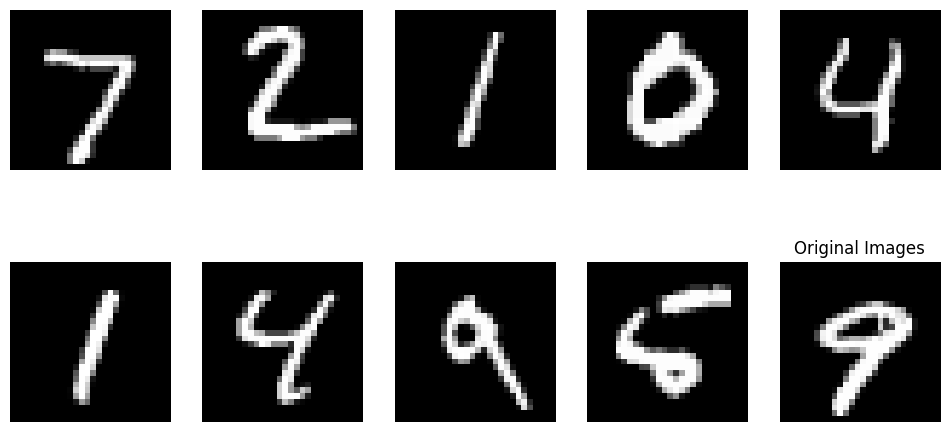

--------------------------------------------------------------------------------


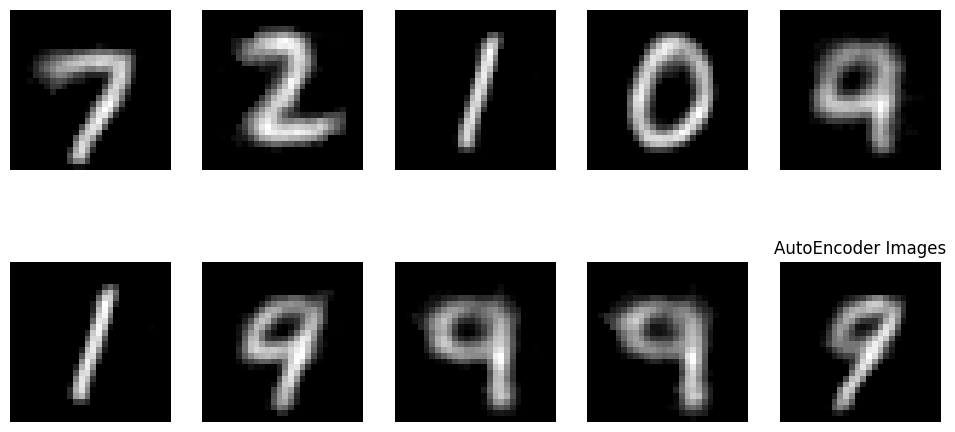

In [21]:
### AutoEncoder 를 통한 이미지 재생성 성능 비교 시각화
decoded_images = loaded_model.predict(X_test)

fig, axes = plt.subplots(2,5)
fig.set_size_inches(12,6)
for i in np.arange(10):
    axes[i//5, i%5].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i//5, i%5].axis('off')
plt.title('Original Images')
plt.show()

print('-'*80)

fig, axes = plt.subplots(2,5)
fig.set_size_inches(12,6)
for i in np.arange(10):
    axes[i//5, i%5].imshow(decoded_images[i].reshape(28,28), cmap='gray')
    axes[i//5, i%5].axis('off')
plt.title('AutoEncoder Images')
plt.show()